In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
%matplotlib inline

In [48]:
df_train = pd.read_csv("train.csv")

In [49]:
df_test = pd.read_csv("test.csv")

In [50]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [51]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [52]:
df_train.shape

(54808, 14)

In [53]:
df_test.shape

(23490, 13)

In [54]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [55]:
df_train["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [56]:
df_train["region"].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [57]:
# Descriptive Stats
df_train.describe()   # left / leave / working in the same company 37  [ outliers ]

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [58]:
df_train.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Target Column')

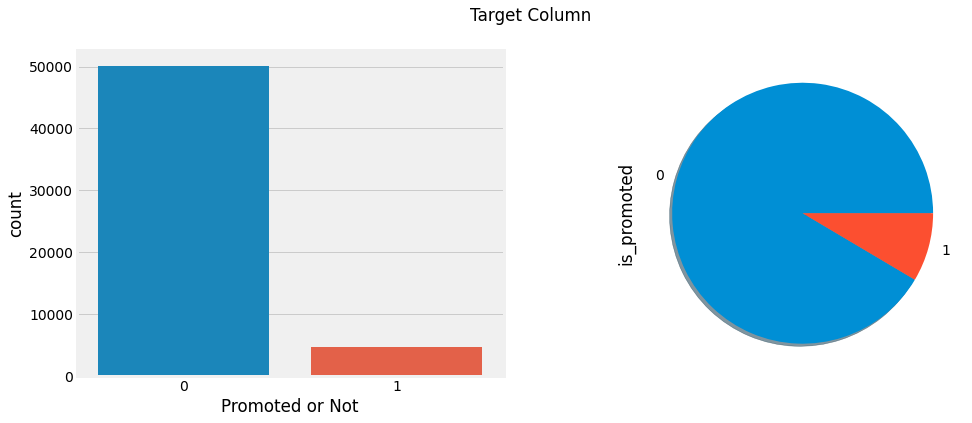

In [59]:
plt.figure(figsize=(15 , 6))
plt.style.use("fivethirtyeight")

plt.subplot(1 , 2 , 1)
sns.countplot(df_train["is_promoted"])
plt.xlabel("Promoted or Not")

plt.subplot(1 , 2, 2)
df_train["is_promoted"].value_counts().plot(kind="pie", labels = [0, 1] , shadow = True)
plt.suptitle("Target Column")

we need to handle imbalance data

In [60]:
# missing values imputation
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [61]:
# prcentage of missing data
train_missing_prec = ((df_train.isnull().sum() / (df_train.shape[0])*100).round(2))
train_missing_prec

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [62]:
test_missing_prec =((df_test.isnull().sum() /(df_test.shape[0])*100).round(2))
test_missing_prec

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64

In [63]:
df_train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [64]:
# eduction is categorical values so we can replace null values with mode
df_train["education"] = df_train["education"].fillna(df_train["education"].mode()[0])

In [65]:
# "previous_year_rating is numerical values so we can replace null values with mean or median
df_train["previous_year_rating"] = df_train["previous_year_rating"].fillna(df_train["previous_year_rating"].mode()[0])

In [66]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

we successfully replace null values with meaning full data points in train data

In [67]:
df_test["education"] = df_test["education"].fillna(df_test["education"].mode()[0])
df_test["previous_year_rating"] = df_test["previous_year_rating"].fillna(df_test["previous_year_rating"].mode()[0])

In [68]:
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

we successfully replace null values with meaning full data points in test data

In [69]:
# outliers data -- > numerical data
df_train.select_dtypes("number").head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

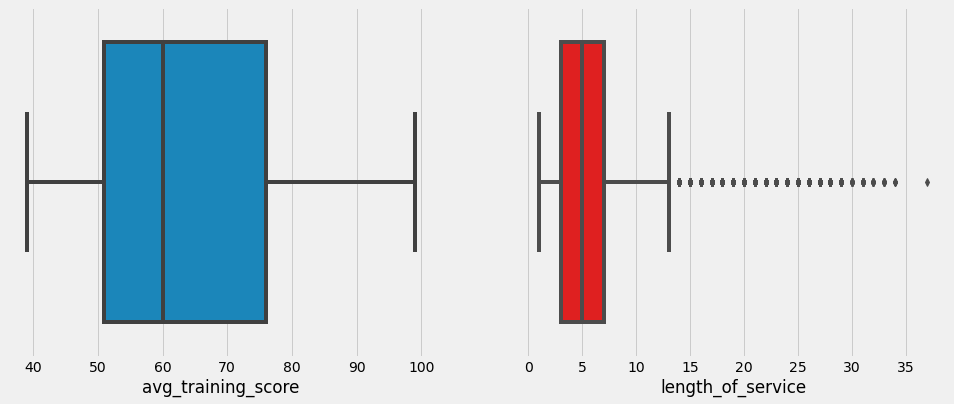

In [70]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.boxplot(x = "avg_training_score" , data=df_train)

plt.subplot(1 , 2, 2)
sns.boxplot(df_train["length_of_service"] , color = "red")

- there are no outliers in avg training score
- there are many outliers in length of service column hence , we have to handle the feature

In [71]:
df_train = df_train[df_train["length_of_service"]<13]

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

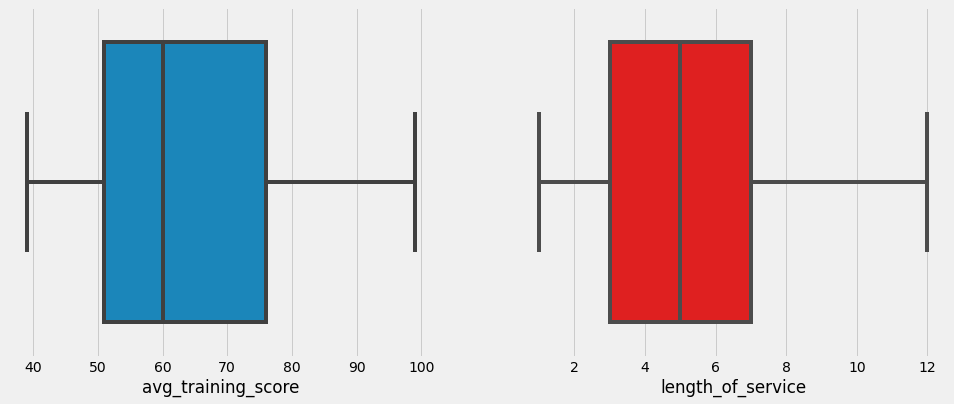

In [72]:
plt.figure(figsize=(15 , 6))
plt.subplot(1 , 2 , 1)
sns.boxplot(x = "avg_training_score" , data=df_train)

plt.subplot(1 , 2, 2)
sns.boxplot(df_train["length_of_service"] , color = "red")

### univariate analysis

In [73]:
df_train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Text(0.5, 1.0, 'awards_won?')

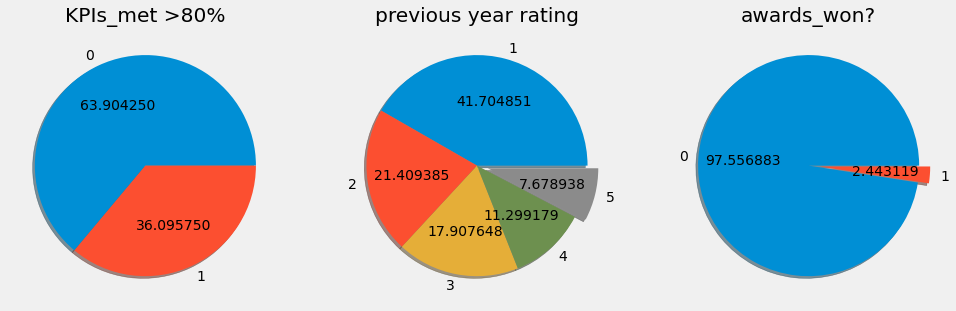

In [74]:
# awards_won , KPIs_met >80 --> Pic chart

# first columns: KPIs_met >80 
plt.figure(figsize=(15 , 6))
plt.subplot(1, 3, 1)
labels = ['0', '1']
explode = [0,0]
size = df_train['KPIs_met >80%'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True, autopct="%2f" )
plt.title("KPIs_met >80%")

# second column
plt.subplot(1, 3, 2)
labels = ["1","2","3","4","5"]
explode = [0,0,0,0,0.1]
size = df_train["previous_year_rating"].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True, autopct="%2f" )
plt.title("previous year rating")

# Thirs Columns: awards_won
plt.subplot(1, 3, 3)
labels = ['0', '1']
explode = [0,0.1]
size = df_train['awards_won?'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True , autopct="%2f")
plt.title("awards_won?")

In [75]:
df_train["no_of_trainings"].value_counts()

1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: no_of_trainings, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Distribution of training data taken by employee')

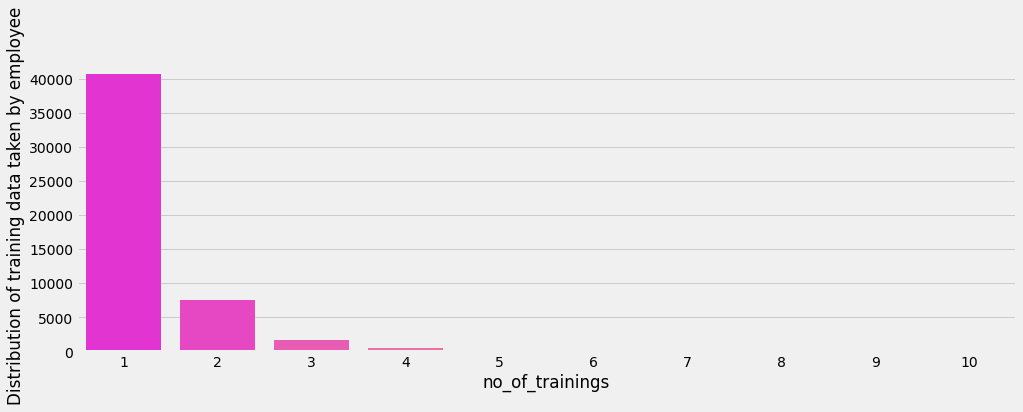

In [76]:
plt.figure(figsize=(15 , 5))
sns.countplot(df_train["no_of_trainings"] , palette="spring")
plt.ylabel("Distribution of training data taken by employee")

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age of Employee')

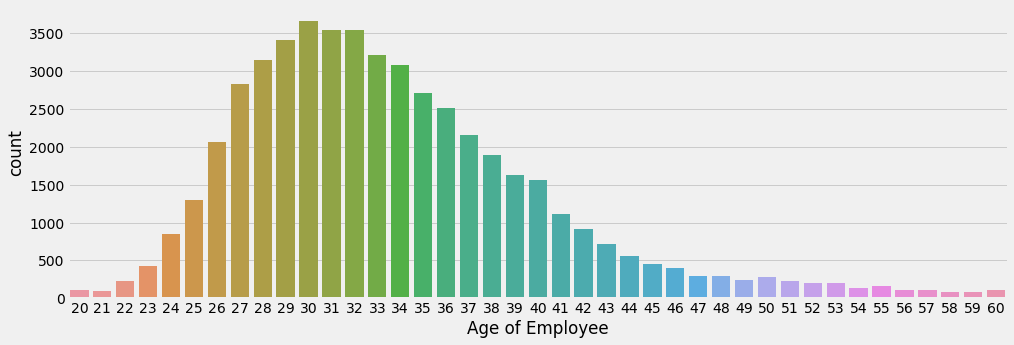

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(df_train["age"])
plt.xlabel("Age of Employee")

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of employees in the different department')

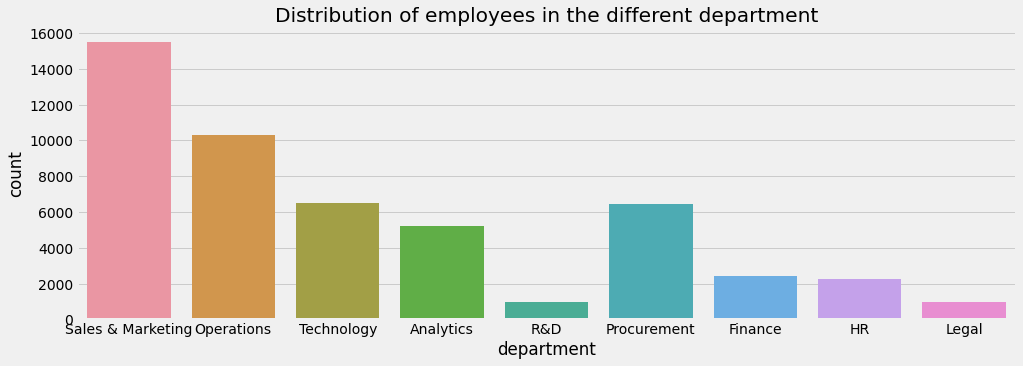

In [78]:
plt.figure(figsize=(15 , 5))
sns.countplot(df_train["department"])
plt.title("Distribution of employees in the different department" , )

<AxesSubplot:xlabel='count', ylabel='region'>

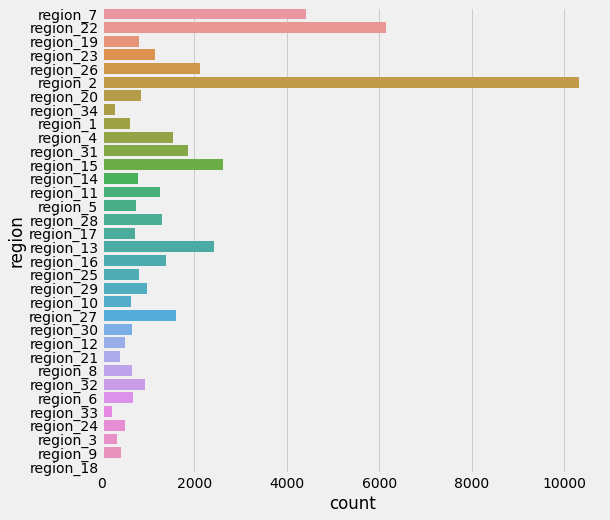

In [79]:
plt.figure(figsize = (8 , 8))
sns.countplot(y = df_train["region"])

([<matplotlib.patches.Wedge at 0x200aea97280>,
 [Text(-0.1894742793704552, 1.0835587189705258, 'other'),
  Text(0.11540656368873799, -1.0939293053289858, 'sourcing'),
  Text(1.0974574608396883, -0.07474705109436924, 'referred')])

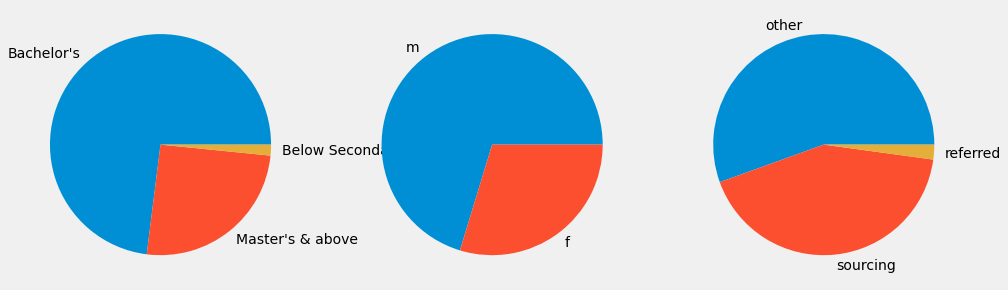

In [80]:
# education , gender , recruitment_channel --> pie chart

plt.figure(figsize=(15 , 8))
# education
plt.subplot(1 , 3 , 1)
labels = df_train["education"].value_counts().index
size = df_train["education"].value_counts()
plt.pie(size , labels=labels)

# gender 
plt.subplot(1 , 3 , 2)
labels = df_train["gender"].value_counts().index
size = df_train["gender"].value_counts()
plt.pie(size , labels = labels)

# recuriement channel
plt.subplot(1 , 3 , 3)
labels = df_train["recruitment_channel"].value_counts().index
size = df_train["recruitment_channel"].value_counts()
plt.pie(size , labels = labels)

### There we done univariate analysis 

### Bivariate analysis

In [81]:
# catergorical - catergorical
# numerical - Catergorial
# numerical - numerical

Text(0.5, 0, 'Effect of gender on Promotion')

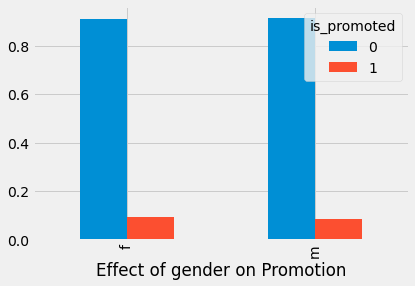

In [82]:
x = pd.crosstab(df_train["gender"] , df_train["is_promoted"])
x.div(x.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel("Effect of gender on Promotion")

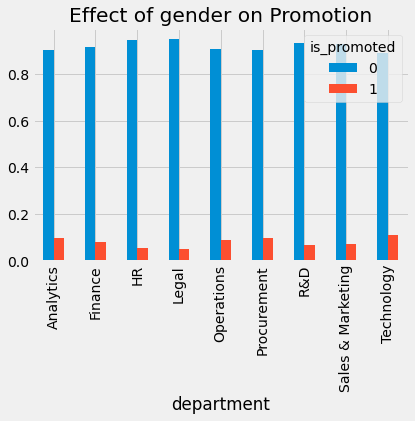

In [83]:
x = pd.crosstab(df_train["department"] , df_train["is_promoted"])
x.div(x.sum(1).astype(float) , axis=0).plot(kind="bar" , stacked=False)
plt.title("Effect of gender on Promotion")
plt.show()

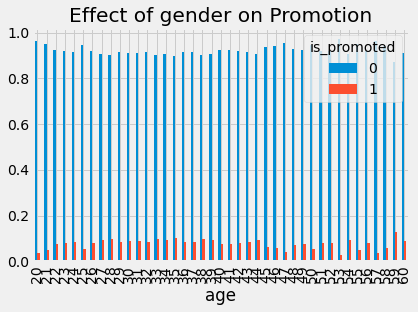

In [84]:
x = pd.crosstab(df_train["age"] , df_train["is_promoted"])
x.div(x.sum(1).astype(float) , axis=0).plot(kind="bar" , stacked=False)
plt.title("Effect of gender on Promotion")
plt.show()

### Multivariate Analysis

Text(0.5, 1.0, 'Correlation of Heatmap')

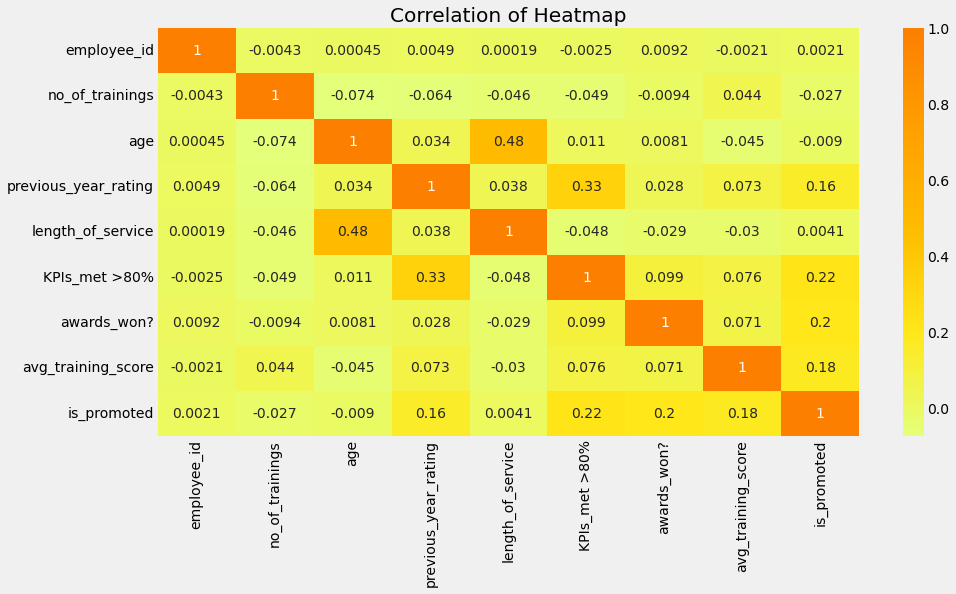

In [85]:
plt.figure(figsize=(14, 7))
sns.heatmap(df_train.corr(), annot=True , cmap="Wistia")
plt.title("Correlation of Heatmap")

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


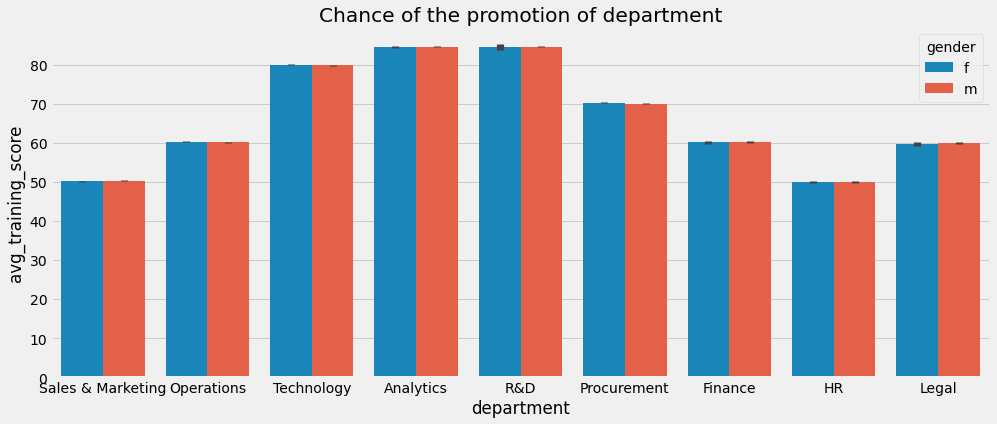

In [86]:
### Deparment and award winner
plt.figure(figsize=(15 , 6))
sns.barplot(df_train["department"] , df_train["avg_training_score"], hue=df_train["gender"])
plt.title("Chance of the promotion of department")
plt.show()

## Feature Engneering

In [87]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [88]:
# create total score column
df_train["total_score"] = df_train["avg_training_score"] * df_train["no_of_trainings"]
df_test["total_score"] = df_test["avg_training_score"] * df_test["no_of_trainings"]

df_train["sum_metrics"] = df_train["awards_won?"] + df_train["KPIs_met >80%"] + df_train["previous_year_rating"]
df_test["sum_metrics"] = df_test["awards_won?"] + df_test["KPIs_met >80%"] + df_test["previous_year_rating"]

In [89]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_score,sum_metrics
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,49,6.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,60,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,50,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,100,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,73,3.0


In [90]:
# remove unneccessay columns
df_train.drop(["employee_id" , "region" , "recruitment_channel" , "no_of_trainings" , "previous_year_rating" , "KPIs_met >80%" , "awards_won?" , "avg_training_score"] , axis=1 , inplace=True)
df_test.drop(["employee_id" , "region" , "recruitment_channel" , "no_of_trainings" , "previous_year_rating" , "KPIs_met >80%" , "awards_won?" , "avg_training_score"] , axis=1 , inplace = True)

In [91]:
df_train.head(2)

,department,education,gender,age,length_of_service,is_promoted,total_score,sum_metrics
0,Sales & Marketing,Master's & above,f,35,8,0,49,6.0
1,Operations,Bachelor's,m,30,4,0,60,5.0


In [93]:
# no award winner , no kpi met > 80 , previous year rating = 1 , avg_training_score <60

# df_train[(df_train["KPIs_met >80%"] == 0) & (df_train["previous_year_rating"] == 1.0) & (df_train["awards_won?"] == 0) &
#        ( df_train["avg_training_score"] < 60) & (df_train["is_promoted"]==1)]

In [94]:
df_train.shape

(50632, 8)

In [95]:
# df_train = df_train.drop(df_train[(df_train["KPIs_met >80%"] == 0) & (df_train["previous_year_rating"] == 1.0) & (df_train["awards_won?"] == 0) &
#        ( df_train["avg_training_score"] < 60) & (df_train["is_promoted"]==1)].index)

In [96]:
df_train.shape

(50632, 8)

In [97]:
df_train.head(2)

,department,education,gender,age,length_of_service,is_promoted,total_score,sum_metrics
0,Sales & Marketing,Master's & above,f,35,8,0,49,6.0
1,Operations,Bachelor's,m,30,4,0,60,5.0


In [98]:
# Encoding
df_train.select_dtypes("object").head(2)

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m


In [99]:
df_train["education"].value_counts()

Bachelor's          36965
Master's & above    12862
Below Secondary       805
Name: education, dtype: int64

In [100]:
df_train["education"].replace(("Master's & above" , "Bachelor's" , "Below Secondary") ,( 3 , 2, 1 ), inplace=True)
df_test["education"].replace(("Master's & above" , "Bachelor's" , "Below Secondary") ,( 3 , 2, 1 ), inplace=True)

In [101]:
df_train.head(2)

,department,education,gender,age,length_of_service,is_promoted,total_score,sum_metrics
0,Sales & Marketing,3,f,35,8,0,49,6.0
1,Operations,2,m,30,4,0,60,5.0


In [102]:
le = LabelEncoder()
# department column
df_train["department"] = le.fit_transform(df_train["department"])
df_test["department"] = le.transform(df_test["department"])

# gender column
df_train["gender"] = le.fit_transform(df_train["gender"])
df_test["gender"] = le.transform(df_test["gender"])

In [103]:
df_train.head(3)

,department,education,gender,age,length_of_service,is_promoted,total_score,sum_metrics
0,7,3,0,35,8,0,49,6.0
1,4,2,1,30,4,0,60,5.0
2,7,2,1,34,7,0,50,3.0


In [104]:
# splitting data into x and y
x = df_train.drop("is_promoted" , axis=1)
y = df_train["is_promoted"]
x_test = df_test

In [105]:
x.shape

(50632, 7)

In [106]:
y.shape

(50632,)

In [107]:
x_test.shape

(23490, 7)

## Handling imblanced Data

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
oversample = SMOTE()
x , y = oversample.fit_resample(x , y)

In [110]:
x_train , x_valid , y_train , y_valid = train_test_split(x , y , test_size=0.2 , random_state=0)

In [111]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(x_test.shape)

(74003, 7)
(18501, 7)
(74003,)
(18501,)
(23490, 7)


## Feature Scaling

In [112]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.transform(x_test)

## Model Building

In [113]:
dc = DecisionTreeClassifier()
dc.fit(x_train , y_train)
y_pred = dc.predict(x_valid)

In [114]:
# training and testing accuracy
print("training acc" , dc.score(x_train , y_train))
print("testing acc" , dc.score(x_valid , y_valid))

training acc 0.9855681526424604
testing acc 0.5217555807794173


In [115]:
cm = confusion_matrix(y_valid , y_pred)

Text(13.060000000000002, 0.5, 'Actual values')

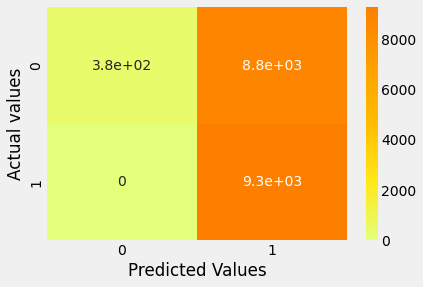

In [116]:
sns.heatmap(cm , annot=True , cmap="Wistia")
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")

In [117]:
cr = classification_report(y_valid , y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.04      0.08      9231
           1       0.51      1.00      0.68      9270

    accuracy                           0.52     18501
   macro avg       0.76      0.52      0.38     18501
weighted avg       0.76      0.52      0.38     18501



In [118]:
df_train.head(2)

,department,education,gender,age,length_of_service,is_promoted,total_score,sum_metrics
0,7,3,0,35,8,0,49,6.0
1,4,2,1,30,4,0,60,5.0


In [120]:
# pred = dc.predict(np.array([[3 , 3, 0 , 1 , 26 , 5.0 , 8 , 1 , 0 , 86 , 78 , 8]]))

In [123]:
# print("Employee will get promotion or not" , pred)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
y_pred = rf.predict(x_valid)

In [129]:
print("training acc" , rf.score(x_train , y_train))
print("testing acc" , rf.score(x_valid , y_valid))

training acc 0.9855681526424604
testing acc 0.6682882006378034


In [126]:
rf_cm = confusion_matrix(y_valid , y_pred)

<AxesSubplot:>

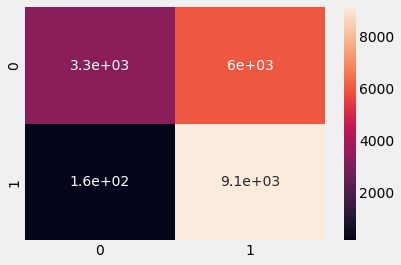

In [127]:
sns.heatmap(rf_cm , annot= True)

In [128]:
print(classification_report(y_valid , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.35      0.51      9231
           1       0.60      0.98      0.75      9270

    accuracy                           0.67     18501
   macro avg       0.78      0.67      0.63     18501
weighted avg       0.78      0.67      0.63     18501



In [130]:
import pickle

In [131]:
filename = "rf.pkl"
pickle.dump(rf , open(filename , "wb"))